# Compute position for diode laser for each date

In [3]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import glob
import os
%matplotlib notebook

In [4]:
def gauss(x, A, mu, sigma, off):
    return A * np.exp(-(x-mu)**2 / (2 * sigma**2)) + off

In [5]:
ppmm = 1/0.0069  # pixels per mm to convert position to mm
#ppmm = 1
print(ppmm)

144.92753623188406


In [6]:
in_path = 'D:/STUDY/Thesis & Internship/pybeamprofiler/data/'
p0 = [50, 400, 50, 1.5]
min_valid_brightness = 50

In [7]:
allfiles = sorted(glob.glob(in_path + '*.png'))
im1 = io.imread(allfiles[0])
imsz = im1.shape
x_rows = np.arange(imsz[1])
x_col = np.arange(imsz[0])
no_images = len(allfiles)
x_pos = np.zeros(no_images)       #array with x position, length equal to number of images
y_pos = np.zeros(no_images)       #array with y position, length equal to number of images
x_ampl = np.zeros(no_images)
x_std = np.zeros(no_images)
y_std = np.zeros(no_images)

for i in range(0, no_images):  #go through all images
    #if np.mod(i,100) == 0:
    print(i)
        
    im = io.imread(allfiles[i])
    
    sum_rows = np.mean(im, axis=0)   #get array with the sums of the rows
    sum_col = np.mean(im, axis=1) #get array with the sums of the columns

    hours = int(i / 60)
    mins = int(i % 60)
    if np.max(im) < min_valid_brightness:        #make sure the image isn't empty, sum of all pixel above certain threshold
        x_pos[i] = np.NAN
        y_pos[i] = np.NAN
    else:
        try:
            mu0 = np.argmax(sum_rows)
            ampl0 = np.max(sum_rows)
            p0[0] = ampl0
            p0[1] = mu0
            popt1,pcov1 = curve_fit(gauss, x_rows, sum_rows, maxfev=50000, p0=p0)
            x_ampl[i] = popt1[0]
            mu0 = np.argmax(sum_col)
            ampl0 = np.max(sum_col)
            p0[0] = ampl0
            p0[1] = mu0
            popt2,pcov2 = curve_fit(gauss, x_col,  sum_col, maxfev=50000, p0=p0)
            x_pos[i] = popt1[1]
            y_pos[i] = popt2[1]
            x_std[i] = popt1[2]
            y_std[i] = popt2[2]
        except:
            print('Exception: ' + str(i))
            x_ampl[i] = np.NaN
            x_pos[i] = np.NaN
            y_pos[i] = np.NaN
            x_std[i] = np.NaN
            y_std[i] = np.NaN
    #f_txt.write(date + str(hours) + ":" + str(mins) + "\t" + str(x_pos[i]) + '\t' +str(y_pos[i]) + '\n')

#f_txt.close()

0
1
2


60544


<IPython.core.display.Javascript object>


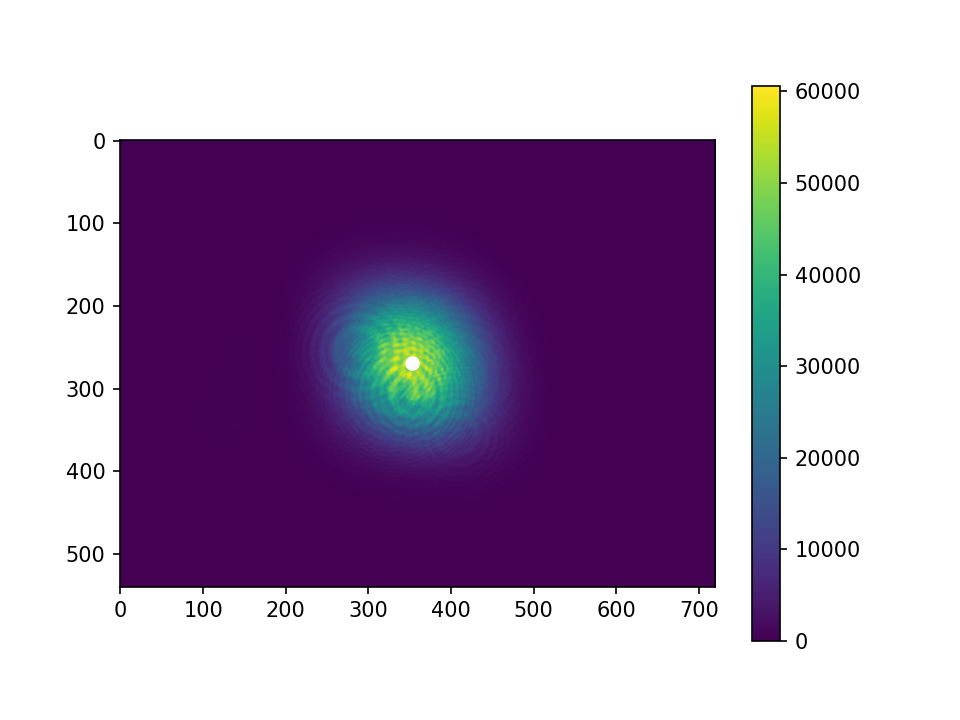

[352.691307889975, 268.5563372918636]


In [8]:
#allfiles = sorted(glob.glob(in_path + '*.png'))
i = 2
im = io.imread(allfiles[i])
print(np.max(im))
sum_rows = np.mean(im, axis=0)   #get array with the sums of the rows
sum_col = np.mean(im, axis=1) #get array with the sums of the columns
mu0 = np.argmax(sum_rows)
p0[1] = mu0
popt1,pcov1 = curve_fit(gauss, x_rows, sum_rows, maxfev=50000, p0=p0)
        
plt.figure()
plt.imshow(im)
plt.colorbar()
plt.scatter(x_pos[i], y_pos[i], c='w')
plt.show()

print([x_pos[i], y_pos[i]])

<IPython.core.display.Javascript object>


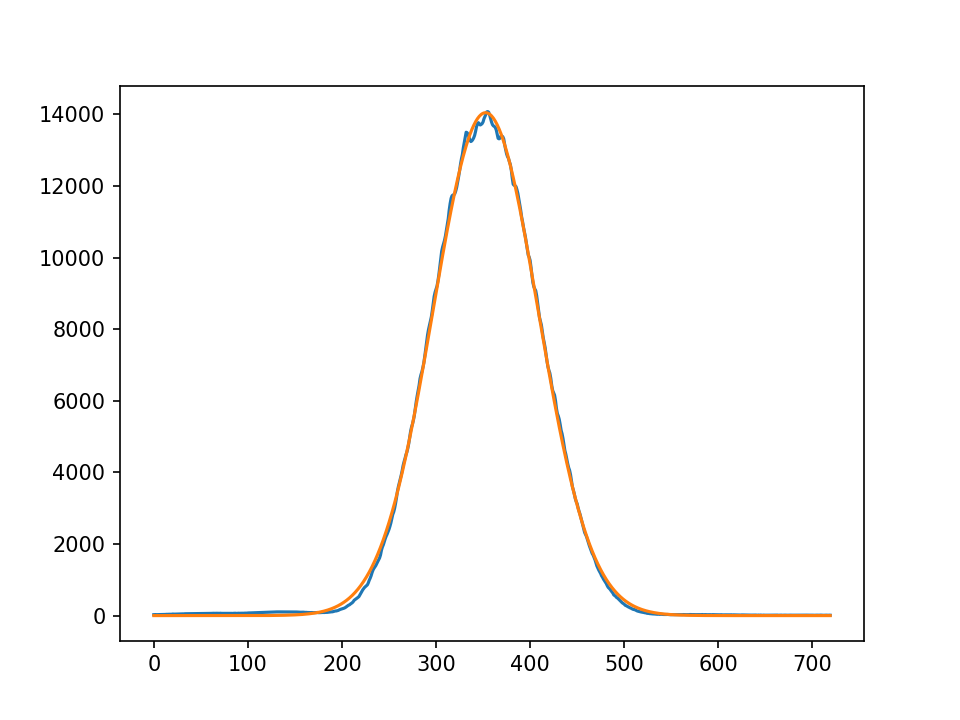

In [31]:
plt.figure()
plt.plot(sum_rows)
plt.plot(x_rows, gauss(x_rows, *popt1))

Here's some docs

In [42]:
mu0 = np.argmax(sum_col)
ampl0 = np.max(sum_col)
p0[0] = ampl0
p0[1] = mu0
popt2,pcov2 = curve_fit(gauss, x_col,  sum_col, maxfev=50000, p0=p0)
print(p0)
plt.figure()
plt.plot(sum_col)
plt.plot(x_col, gauss(x_col, *popt2))